# Heart Disease Prediction

In this machine learning project, We have collected the dataset from Kaggle (https://www.kaggle.com/ronitf/heart-disease-uci) and We will be using Machine Learning to make predictions on whether a person is suffering from Heart Disease or not.

# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from matplotlib import rcParams
from matplotlib.cm import rainbow
import plotly.express as px
import plotly.graph_objs as go
%matplotlib inline
import warnings

# Importing dataset

In [2]:
dataset = pd.read_csv('heart.csv')

In [3]:
dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [5]:

info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]



for i in range(len(info)):
    print(dataset.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
dataset['target']

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [9]:
dataset.groupby('target').size()

target
0    138
1    165
dtype: int64

In [10]:
dataset.shape

(303, 14)

In [11]:
dataset['target'].unique()

array([1, 0])

# Understanding the data

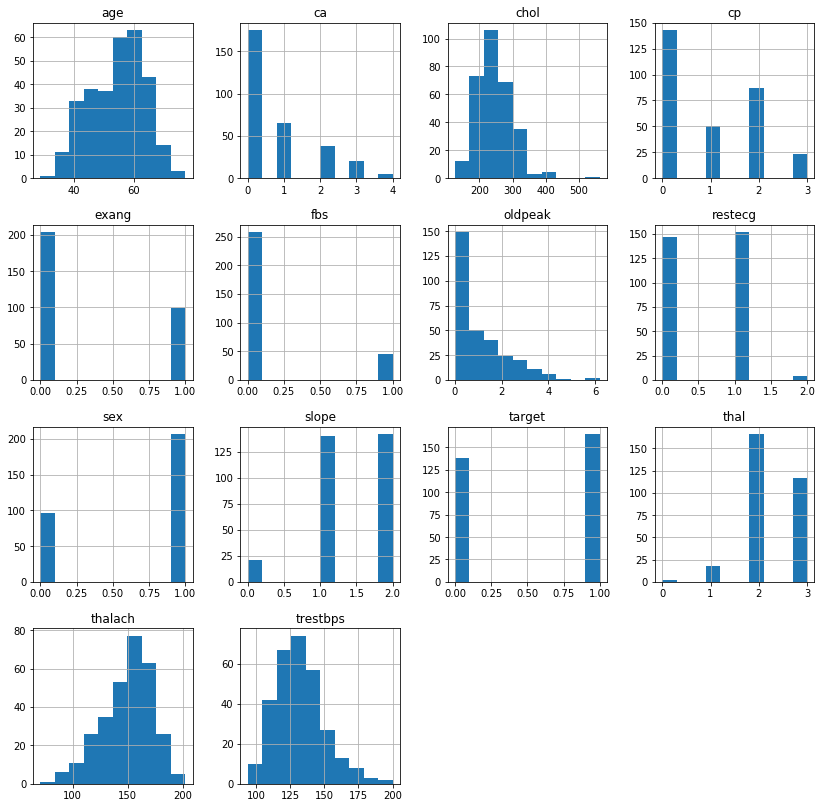

In [13]:
dataset.hist(figsize=(14,14))
plt.show()

1    165
0    138
Name: target, dtype: int64


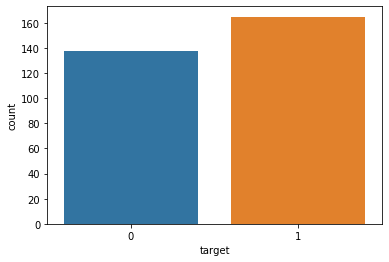

In [14]:
y = dataset["target"]

sns.countplot(y)


target_temp = dataset.target.value_counts()

print(target_temp)

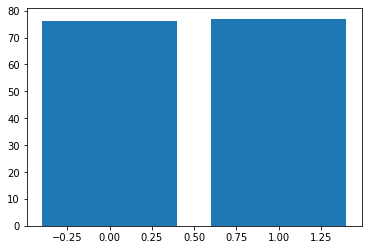

In [15]:
plt.bar(x=dataset['sex'],height=dataset['age'])
plt.show()

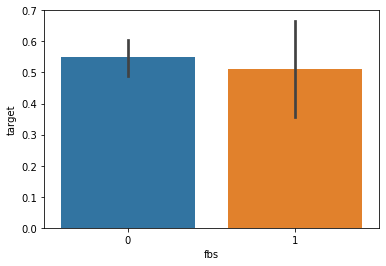

In [17]:
sns.barplot(x="fbs", y="target", data=dataset)
plt.show()

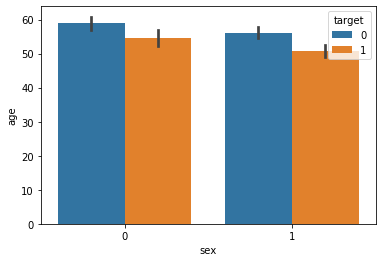

In [18]:
sns.barplot(x=dataset['sex'],y=dataset['age'],hue=dataset['target'])

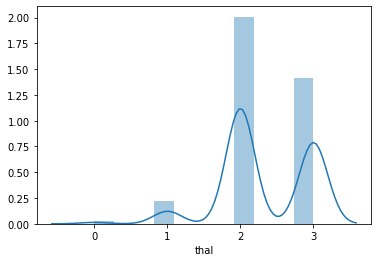

In [20]:
sns.distplot(dataset["thal"])

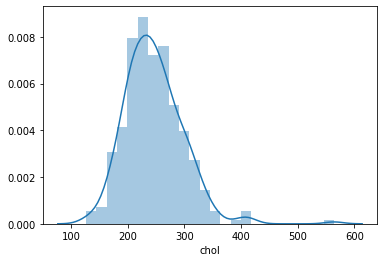

In [21]:
sns.distplot(dataset["chol"])

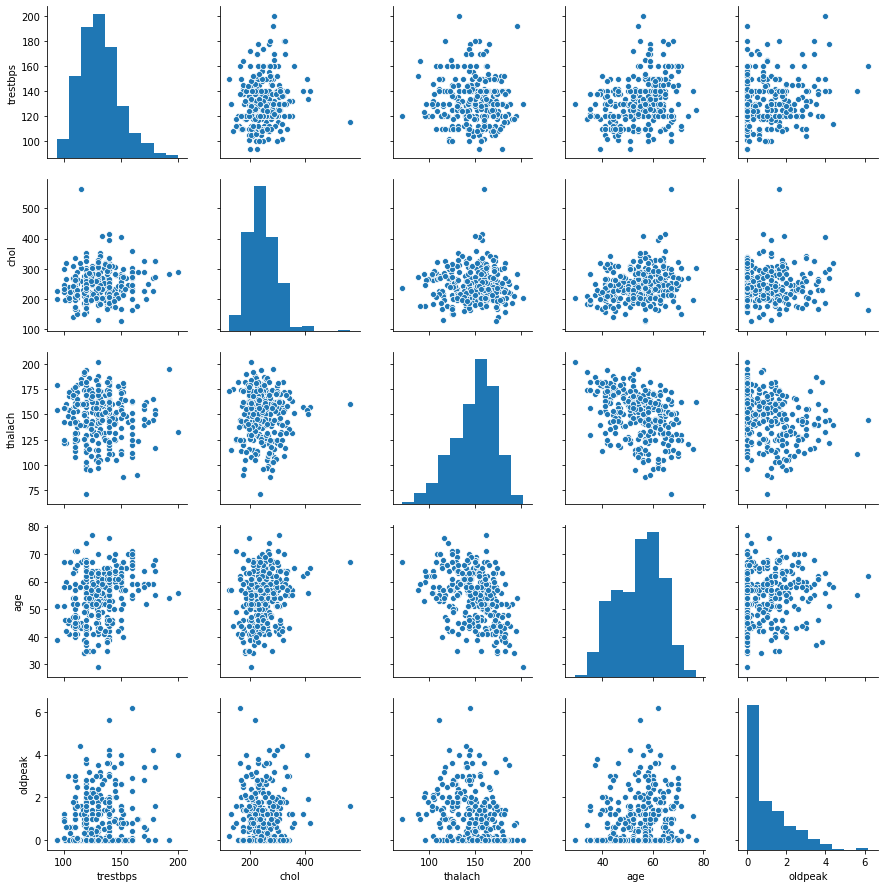

In [22]:
numeric_columns=['trestbps','chol','thalach','age','oldpeak']
sns.pairplot(dataset[numeric_columns])

In [27]:

categorical_values = []
for column in dataset.columns:
    print('==============================')
    print(f"{column} : {dataset[column].unique()}")
    if len(dataset[column].unique()) <= 10:
        categorical_values.append(column)

age : [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
sex : [1 0]
cp : [3 2 1 0]
trestbps : [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
chol : [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 300 293 184 409 259 200 327 237 218
 319 166 311 169 187 176 241 131]
fbs :

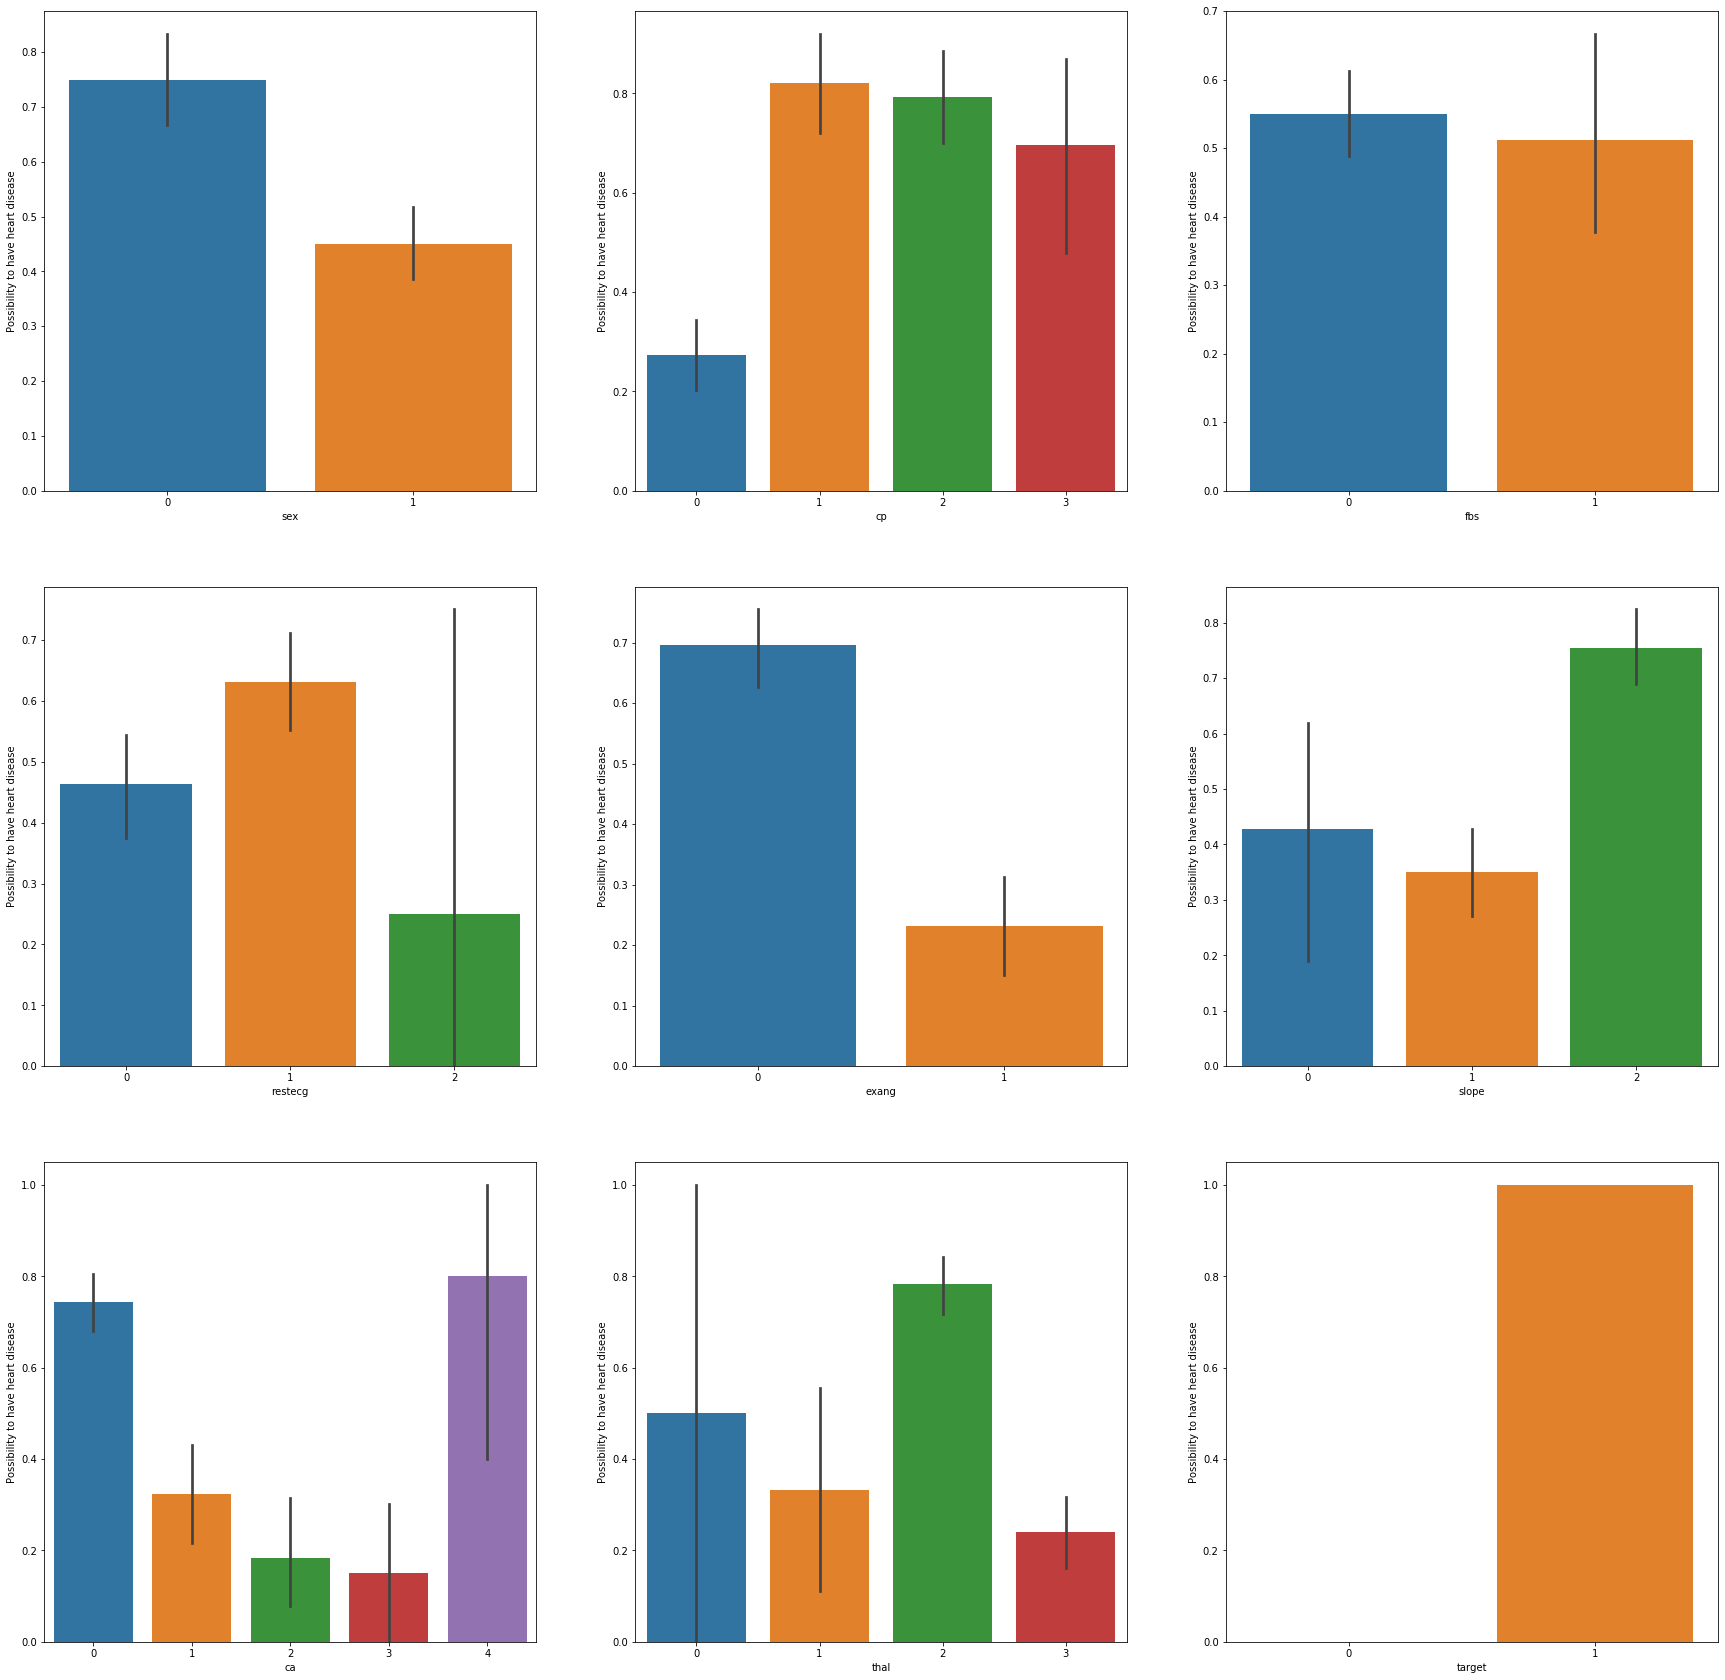

In [29]:
plt.figure(figsize=(30, 30))
for i, column in enumerate(categorical_values, 1):
    plt.subplot(3, 3, i)
    sns.barplot(x=f"{column}", y='target', data=dataset)
    plt.ylabel('Possibility to have heart disease')
    plt.xlabel(f'{column}')

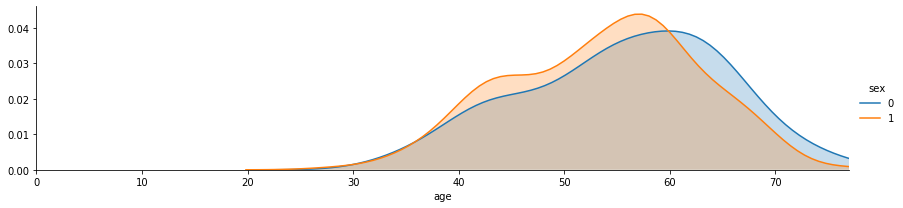

In [30]:

fig = sns.FacetGrid(dataset, hue="sex", aspect=4)
fig.map(sns.kdeplot, 'age', shade=True)
oldest = dataset['age'].max()
fig.set(xlim=(0, oldest))
fig.add_legend()

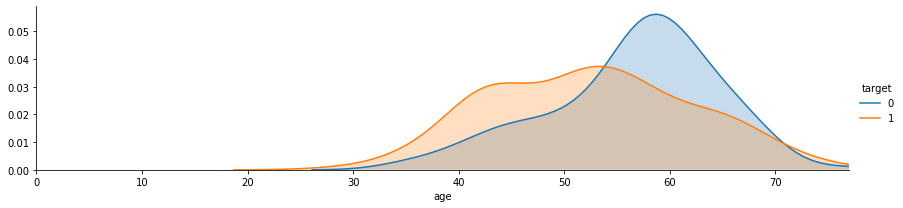

In [31]:
fig = sns.FacetGrid(dataset, hue="target", aspect=4)
fig.map(sns.kdeplot, 'age', shade=True)
oldest = dataset['age'].max()
fig.set(xlim=(0, oldest))
fig.add_legend()

# Correlation Matrix

The best way to compare relationship between various features is to look at the correlation matrix between those features.

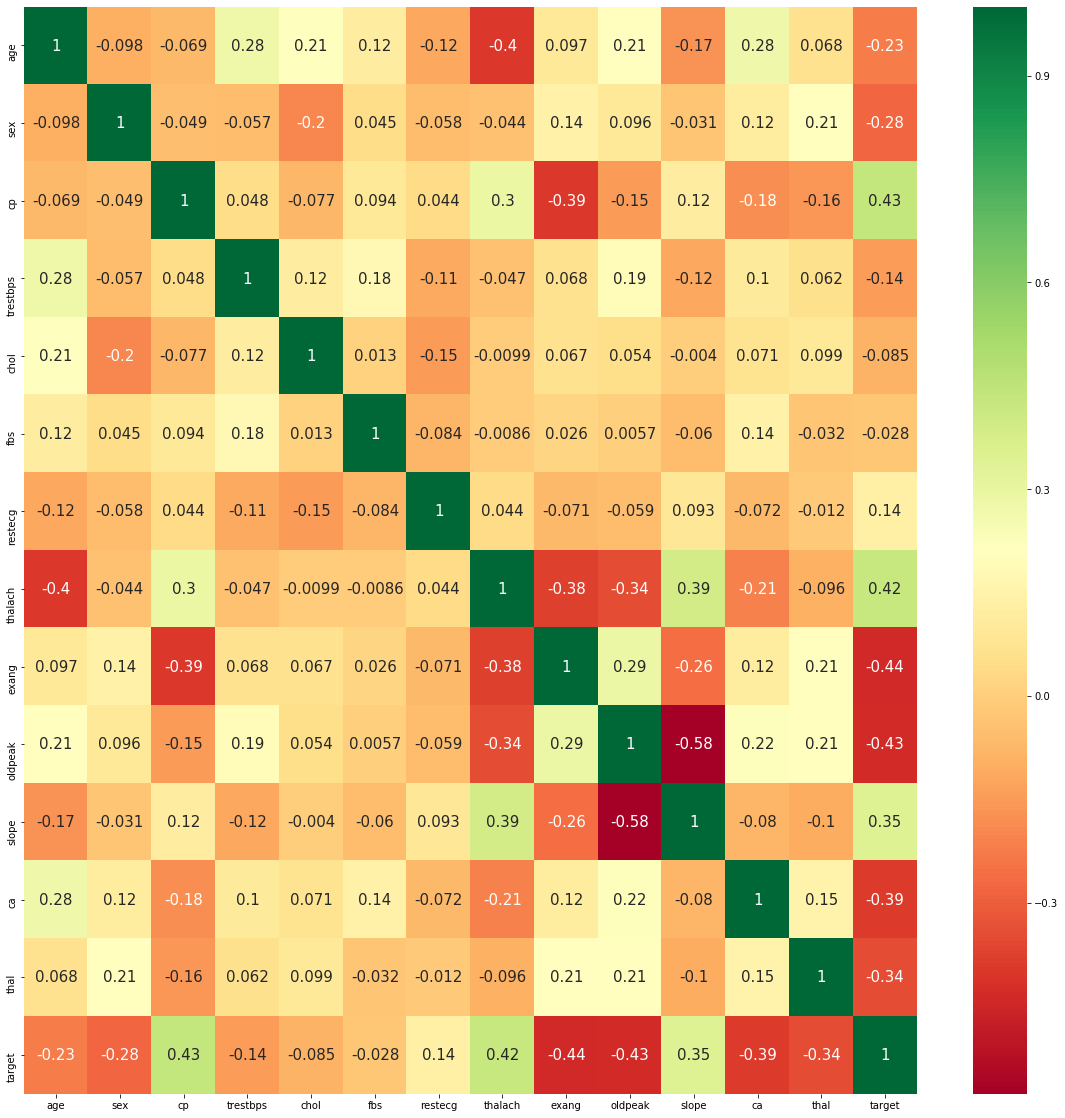

In [33]:
corr_matrix = dataset.corr()
top_corr_feature = corr_matrix.index
plt.figure(figsize=(20, 20))
sns.heatmap(dataset[top_corr_feature].corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})

# Data Processing

In [73]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [74]:
x = dataset.drop(['target'], axis = 1)
y = dataset.target.values

In [75]:
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])

In [76]:
#train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=10,test_size=0.3,shuffle=True)

In [77]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
246,0.562500,0.0,0.000000,0.377358,0.646119,0.0,0.0,0.603053,1.0,0.306452,0.5,0.50,1.000000
183,0.604167,1.0,0.666667,0.169811,0.237443,0.0,0.0,0.717557,0.0,0.403226,0.5,0.25,1.000000
229,0.729167,1.0,0.666667,0.292453,0.417808,0.0,0.5,0.458015,1.0,0.290323,0.5,0.00,1.000000
126,0.375000,1.0,0.000000,0.169811,0.178082,0.0,0.5,0.549618,0.0,0.016129,1.0,0.00,0.666667
184,0.437500,1.0,0.000000,0.528302,0.267123,0.0,0.0,0.435115,0.0,0.419355,0.5,0.00,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,0.687500,0.0,0.000000,0.283019,0.189498,0.0,0.5,0.702290,0.0,0.000000,1.0,0.00,0.666667
21,0.312500,1.0,0.666667,0.339623,0.244292,0.0,0.5,0.824427,1.0,0.064516,1.0,0.00,0.666667
210,0.583333,1.0,0.666667,0.320755,0.235160,0.0,0.0,0.603053,0.0,0.064516,0.5,0.25,1.000000
78,0.479167,1.0,0.333333,0.320755,0.180365,1.0,0.5,0.862595,0.0,0.000000,1.0,0.00,0.666667


In [78]:
y_test

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0])

In [79]:
print ("train_set_x shape: " + str(X_train.shape))
print ("train_set_y shape: " + str(y_train.shape))
print ("test_set_x shape: " + str(X_test.shape))
print ("test_set_y shape: " + str(y_test.shape))


train_set_x shape: (212, 13)
train_set_y shape: (212,)
test_set_x shape: (91, 13)
test_set_y shape: (91,)


# Machine Learning Models

In [99]:
# Decision Tree Classifier
scores_dict = {}

In [100]:
from sklearn.metrics import accuracy_score,mean_squared_error
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [101]:
prediction=dt.predict(X_test)
accuracy_dt=accuracy_score(y_test,prediction)*100

In [102]:
scores_dict['DecisionTreeClassifier'] = accuracy_dt
print(accuracy_dt)

76.92307692307693


In [103]:
#Feature Importance in Decision Trees
print("Feature importances:\n{}".format(dt.feature_importances_))

Feature importances:
[0.06777523 0.03461456 0.34803953 0.05530712 0.092912   0.
 0.         0.08658924 0.04724994 0.05887198 0.07300416 0.11946876
 0.01616748]


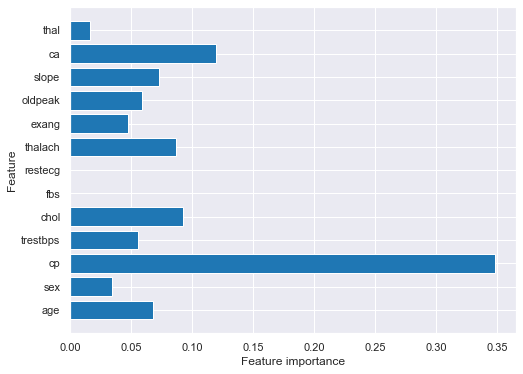

In [104]:
def plot_feature_importances_diabetes(model):
    plt.figure(figsize=(8,6))
    n_features = 13
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
plot_feature_importances_diabetes(dt)
plt.savefig('feature_importance')

In [105]:
# KNN

In [106]:
from sklearn.neighbors import KNeighborsClassifier

In [107]:
k_range=range(1,26)
scores={}
h_score = 0       # to find the best score
best_k=0          # to find the best k
scores_list=[]  

for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    prediction_knn=knn.predict(X_test)
    scores[k]=accuracy_score(y_test,prediction_knn)
    if scores[k]>h_score:
        h_score = scores[k]
        best_k = k

    scores_list.append(accuracy_score(y_test,prediction_knn))
print('The best value of k is {} with score : {}'.format(best_k,h_score))

The best value of k is 3 with score : 0.7912087912087912


In [108]:
knn=KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [109]:
prediction_knn=knn.predict(X_test)
accuracy_knn=accuracy_score(y_test,prediction_knn)*100
print('accuracy_score score     : ',accuracy_score(y_test,prediction_knn)*100,'%')
print('mean_squared_error score : ',mean_squared_error(y_test,prediction_knn)*100,'%')

accuracy_score score     :  79.12087912087912 %
mean_squared_error score :  20.87912087912088 %


In [110]:
scores_dict['KNeighborsClassifier'] = accuracy_knn
accuracy_knn

79.12087912087912

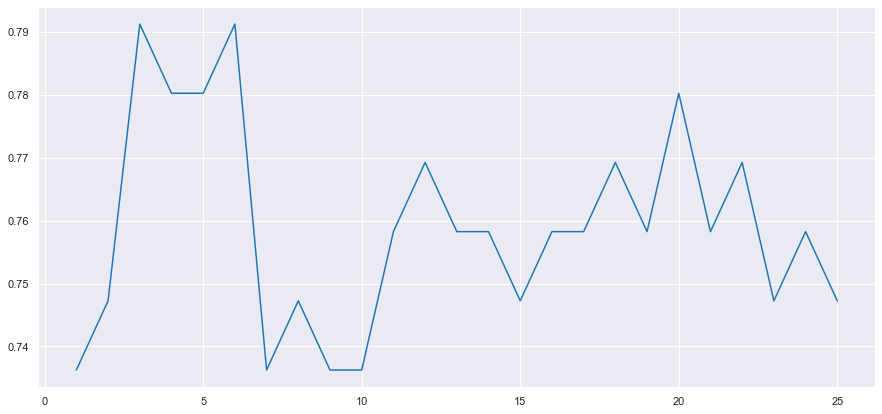

In [111]:
plt.plot(k_range,scores_list)

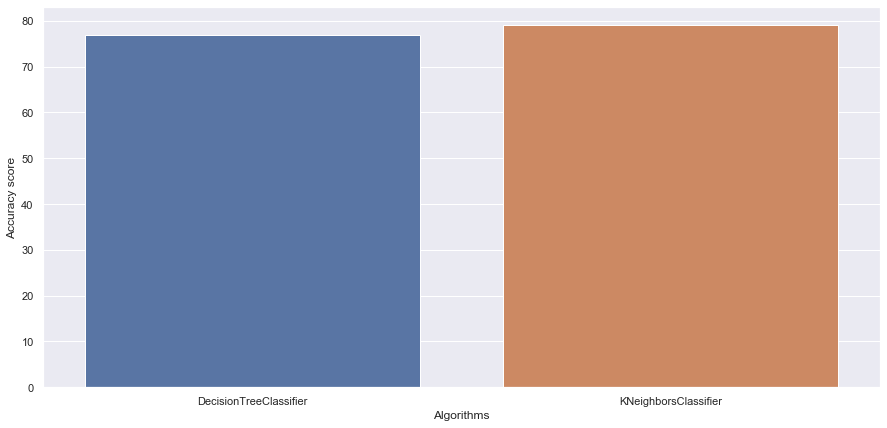

In [112]:
with sns.color_palette('muted'):
  algo_name = list(scores_dict.keys())
  scoress = list(scores_dict.values())

  sns.set(rc={'figure.figsize':(15,7)})
  plt.xlabel("Algorithms")
  plt.ylabel("Accuracy score")

  sns.barplot(algo_name,scoress)